In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

In [8]:
W = -0.2
St = (0.2, 1)
R = 1
t0 = 0
tf = 30
case = 1

# load_data = np.load(f'FULL_hills_i_W{W}_St{St}_R{R}_tf{tf}.npz')
load_data = np.load(f'FULL_hills_i_W{W}_caseSt{case}_R{R}_tf{tf}.npz')
tracks = load_data['data']

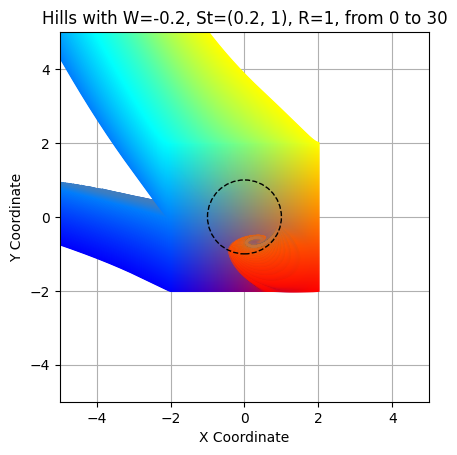

In [9]:
N, _, Nt = tracks.shape

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot a dashed circle
circle = Circle((0,0), 1, fill=False, color='black', linestyle='--', zorder=5)
ax.add_patch(circle)


# Generate a color spectrum based on initial positions
initial_positions = tracks[:, :, 0]  # Get initial positions of all particles
x0_values = initial_positions[:, 0]
y0_values = initial_positions[:, 1]
normalized_x0 = (x0_values - np.min(x0_values)) / (np.max(x0_values) - np.min(x0_values))
normalized_y0 = (y0_values - np.min(y0_values)) / (np.max(y0_values) - np.min(y0_values))
colors = np.column_stack((normalized_x0, normalized_y0, 1 - normalized_x0))

# Iterate through each particle's trajectory
for i in range(N):

    x_trajectory = tracks[i, 0, :]
    y_trajectory = tracks[i, 1, :]

    # Plot the trajectory of the current particle with a color based on its initial position
    ax.plot(x_trajectory, y_trajectory, color=colors[i])


# Set labels and legend
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title(f'Hills with W={W}, St={St}, R={R}, from {t0} to {tf}')

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')


# Show the plot
plt.grid(True)

#  # Plot a circle
# circle = Circle((0, 0), 1, fill=False, color='black', linestyle='dashed')
# ax.add_patch(circle)


plt.show()

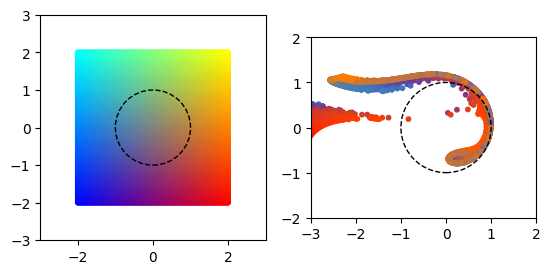

In [10]:
# Plot initial color distribution
fig, ax = plt.subplots(1, 2)


# Create a scatter plot to show the initial color distribution of particles
initial_x_positions = tracks[:, 0, 0]
initial_y_positions = tracks[:, 1, 0]
ax[0].scatter(initial_x_positions, initial_y_positions, c=colors, s=10)
ax[0].set_xlim(-3,3)
ax[0].set_ylim(-3,3)

# Create a scatter plot to show the final color distribution of particles
final_x_positions = tracks[:, 0, -1]
final_y_positions = tracks[:, 1, -1]
ax[1].scatter(final_x_positions, final_y_positions, c=colors, s=10)
ax[1].set_xlim(-3, 2)
ax[1].set_ylim(-2, 2)

# Plot a dashed circle
circle_0 = Circle((0,0), 1, fill=False, color='black', linestyle='--', zorder=5)
ax[0].add_patch(circle_0)
ax[0].set_aspect('equal')

circle_1 = Circle((0,0), 1, fill=False, color='black', linestyle='--', zorder=5)
ax[1].add_patch(circle_1)
ax[1].set_aspect('equal')